
# Semestral Work Assignment (4IZ172) – Clustering


# Imports

## Libraries

In [116]:
# pandas -> we are working with dataframes
import pandas as pd
import numpy as np

# chardet -> used for the detection of the encoding of the csv file
import chardet

# sklearn -> the library of choice for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# scipy
import scipy.cluster.hierarchy as sch

# re -> for regular expressions to clean text
import re

# nltk -> natural language tool kit, the library we will use for NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# inflect ->
import inflect

# matplotlib and seaborn -> for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brzak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\brzak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brzak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


## Dataset
For this coursework i chose the FR aerospace dataset.

Not all datasets to choose from for this coursework are encoded the same, so let's look at this one in particular.

In [118]:
path = "data/RawDatasetFISbachelor.csv"
with open(path, 'rb') as f:
    rawdata = f.read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

Detected encoding: UTF-8-SIG


By having a quick look at the file, we see it is a normal utf-8 csv, let's load it!

In [119]:
# We have the encoding, now we can read the CSV file
df_fis = pd.read_csv("data/RawDatasetFISbachelor.csv", sep=";")

### Dataset statistics

In [120]:
na_count = df_fis.isna().any(axis=1).sum()
print(na_count)
print(df_fis.shape[0]-na_count)

0
189


There are 49 rows containing at least 1 NA value. If we delete those, we are left with 556 full rows.


# Preprocessing
The section should contain:

Description of preprocessing steps involved
Report on the preprocessing results


In [121]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Lemmatize each token
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stem each token
    
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a string
    return " ".join(lemmatized_tokens)


df_fis['EN_preprocessed'] = df_fis['AbstractEN'].apply(preprocess)
for i in range(5):
    print(df_fis['EN_preprocessed'].iloc[i])

    
df_fis = df_fis.drop(labels=[10, 36, 43, 44, 50, 61, 106, 113, 135, 139, 141, 143, 158, 174, 184], axis=0)

the present bachelor thesi focus on a detail analysi of data architectur , process , and role in a select small or medium-s enterpris . the aim is to identifi key area for improv the effici and competit of the enterpris . thi thesi will provid the enterpris with a set of suggest for improv . the propos will focu on data govern , modern data architectur , new role , and process . the research method includ a literatur search and a semi-structur interview with a select data profession oper in the select compani . base on the analysi of the statu , specif improv and measur will be propos . these suggest will then be valid with expert and practition in the field to verifi their relev and feasibl .
the thesi is centr around design and implement an e-shop which sell custom made paint . along with that the site will serv as an onlin present for the artist bc . kateřina beránková , whose art piec are display there . for the develop i use the mmsp methodolog , thank to which i wa abl to custom 

### TF-IDF matrix

In [122]:
documents = df_fis["EN_preprocessed"].tolist()
names = df_fis["titleEN"].tolist()
tfidfvectorizer = TfidfVectorizer(stop_words='english')
countvectorizer = TfidfVectorizer(stop_words='english', use_idf=False, norm=None)

tfidf = tfidfvectorizer.fit_transform(raw_documents=documents)
tfidf_df = pd.DataFrame(tfidf.todense(), index=names, columns=tfidfvectorizer.get_feature_names_out())

absolute_tfidf = countvectorizer.fit_transform(raw_documents=documents)
absolute_tfidf_df = pd.DataFrame(absolute_tfidf.todense(), index=names, columns=countvectorizer.get_feature_names_out())

similarity_matrix = cosine_similarity(tfidf)
tfidf_df # type: ignore

03bb  100   14  183   19  \
Analysis of data architecture, processes and ro...   0.0  0.0  0.0  0.0  0.0   
E-shop for selling custom artwork                    0.0  0.0  0.0  0.0  0.0   
Fake news and manipulation on social networks        0.0  0.0  0.0  0.0  0.0   
Migrating on-premise web application to the cloud    0.0  0.0  0.0  0.0  0.0   
Mobile application for monitoring and improving...   0.0  0.0  0.0  0.0  0.0   
...                                                  ...  ...  ...  ...  ...   
Flask homework app                                   0.0  0.0  0.0  0.0  0.0   
Application portfolio for event management support   0.0  0.0  0.0  0.0  0.0   
AI-powered competitive website search system         0.0  0.0  0.0  0.0  0.0   
Development of a Library Set for Teaching the F...   0.0  0.0  0.0  0.0  0.0   
Development of note application for Android OS       0.0  0.0  0.0  0.0  0.0   

                                                    19510  1995   20  2013  \
Analysis of data architecture, processes and ro...    0.0   0.0  0.0   0.0   
E-shop for selling custom artwork                     0.0   0.0  0.0   0.0   
Fake news and manipulation on social networks         0.0   0.0  0.0   0.0   
Migrating on-premise web application to the cloud     0.0   0.0  0.0   0.0   
Mobile application for monitoring and improving...    0.0   0.0  0.0   0.0   
...                                                   ...   ...  ...   ...   
Flask homework app                                    0.0   0.0  0.0   0.0   
Application portfolio for event management support    0.0   0.0  0.0   0.0   
AI-powered competitive website search system          0.0   0.0  0.0   0.0   
Development of a Library Set for Teaching the F...    0.0   0.0  0.0   0.0   
Development of note application for Android OS        0.0   0.0  0.0   0.0   

                                                    2014  ...  yield  \
Analysis of data architecture, processes and ro...   0.0  ...    0.0   
E-shop for selling custom artwork                    0.0  ...    0.0   
Fake news and manipulation on social networks        0.0  ...    0.0   
Migrating on-premise web application to the cloud    0.0  ...    0.0   
Mobile application for monitoring and improving...   0.0  ...    0.0   
...                                                  ...  ...    ...   
Flask homework app                                   0.0  ...    0.0   
Application portfolio for event management support   0.0  ...    0.0   
AI-powered competitive website search system         0.0  ...    0.0   
Development of a Library Set for Teaching the F...   0.0  ...    0.0   
Development of note application for Android OS       0.0  ...    0.0   

                                                       young  younger  youth  \
Analysis of data architecture, processes and ro...  0.000000      0.0    0.0   
E-shop for selling custom artwork                   0.000000      0.0    0.0   
Fake news and manipulation on social networks       0.204644      0.0    0.0   
Migrating on-premise web application to the cloud   0.000000      0.0    0.0   
Mobile application for monitoring and improving...  0.000000      0.0    0.0   
...                                                      ...      ...    ...   
Flask homework app                                  0.000000      0.0    0.0   
Application portfolio for event management support  0.000000      0.0    0.0   
AI-powered competitive website search system        0.000000      0.0    0.0   
Development of a Library Set for Teaching the F...  0.000000      0.0    0.0   
Development of note application for Android OS      0.000000      0.0    0.0   

                                                    youtub  zabbix  zone  \
Analysis of data architecture, processes and ro...     0.0     0.0   0.0   
E-shop for selling custom artwork                      0.0     0.0   0.0   
Fake news and manipulation on social networks          0.0     0.0   0.0   
Migrating on-premise web

### PCA

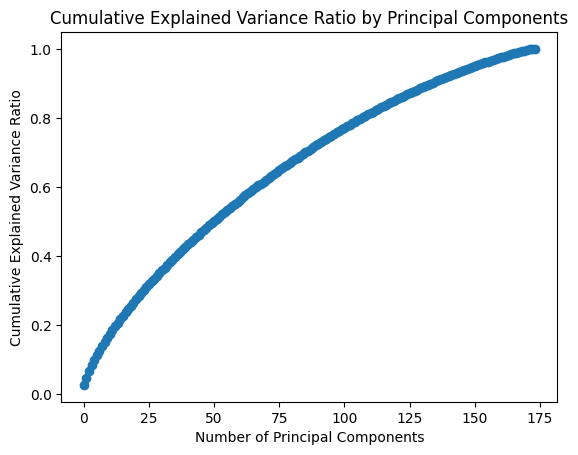

In [123]:
pca_tuning = PCA()
X_pca_tuning = pca_tuning.fit_transform(tfidf_df)

explained_variance = pca_tuning.explained_variance_
total_explained_variance = explained_variance.sum()

explained_variance_ratio = pca_tuning.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()


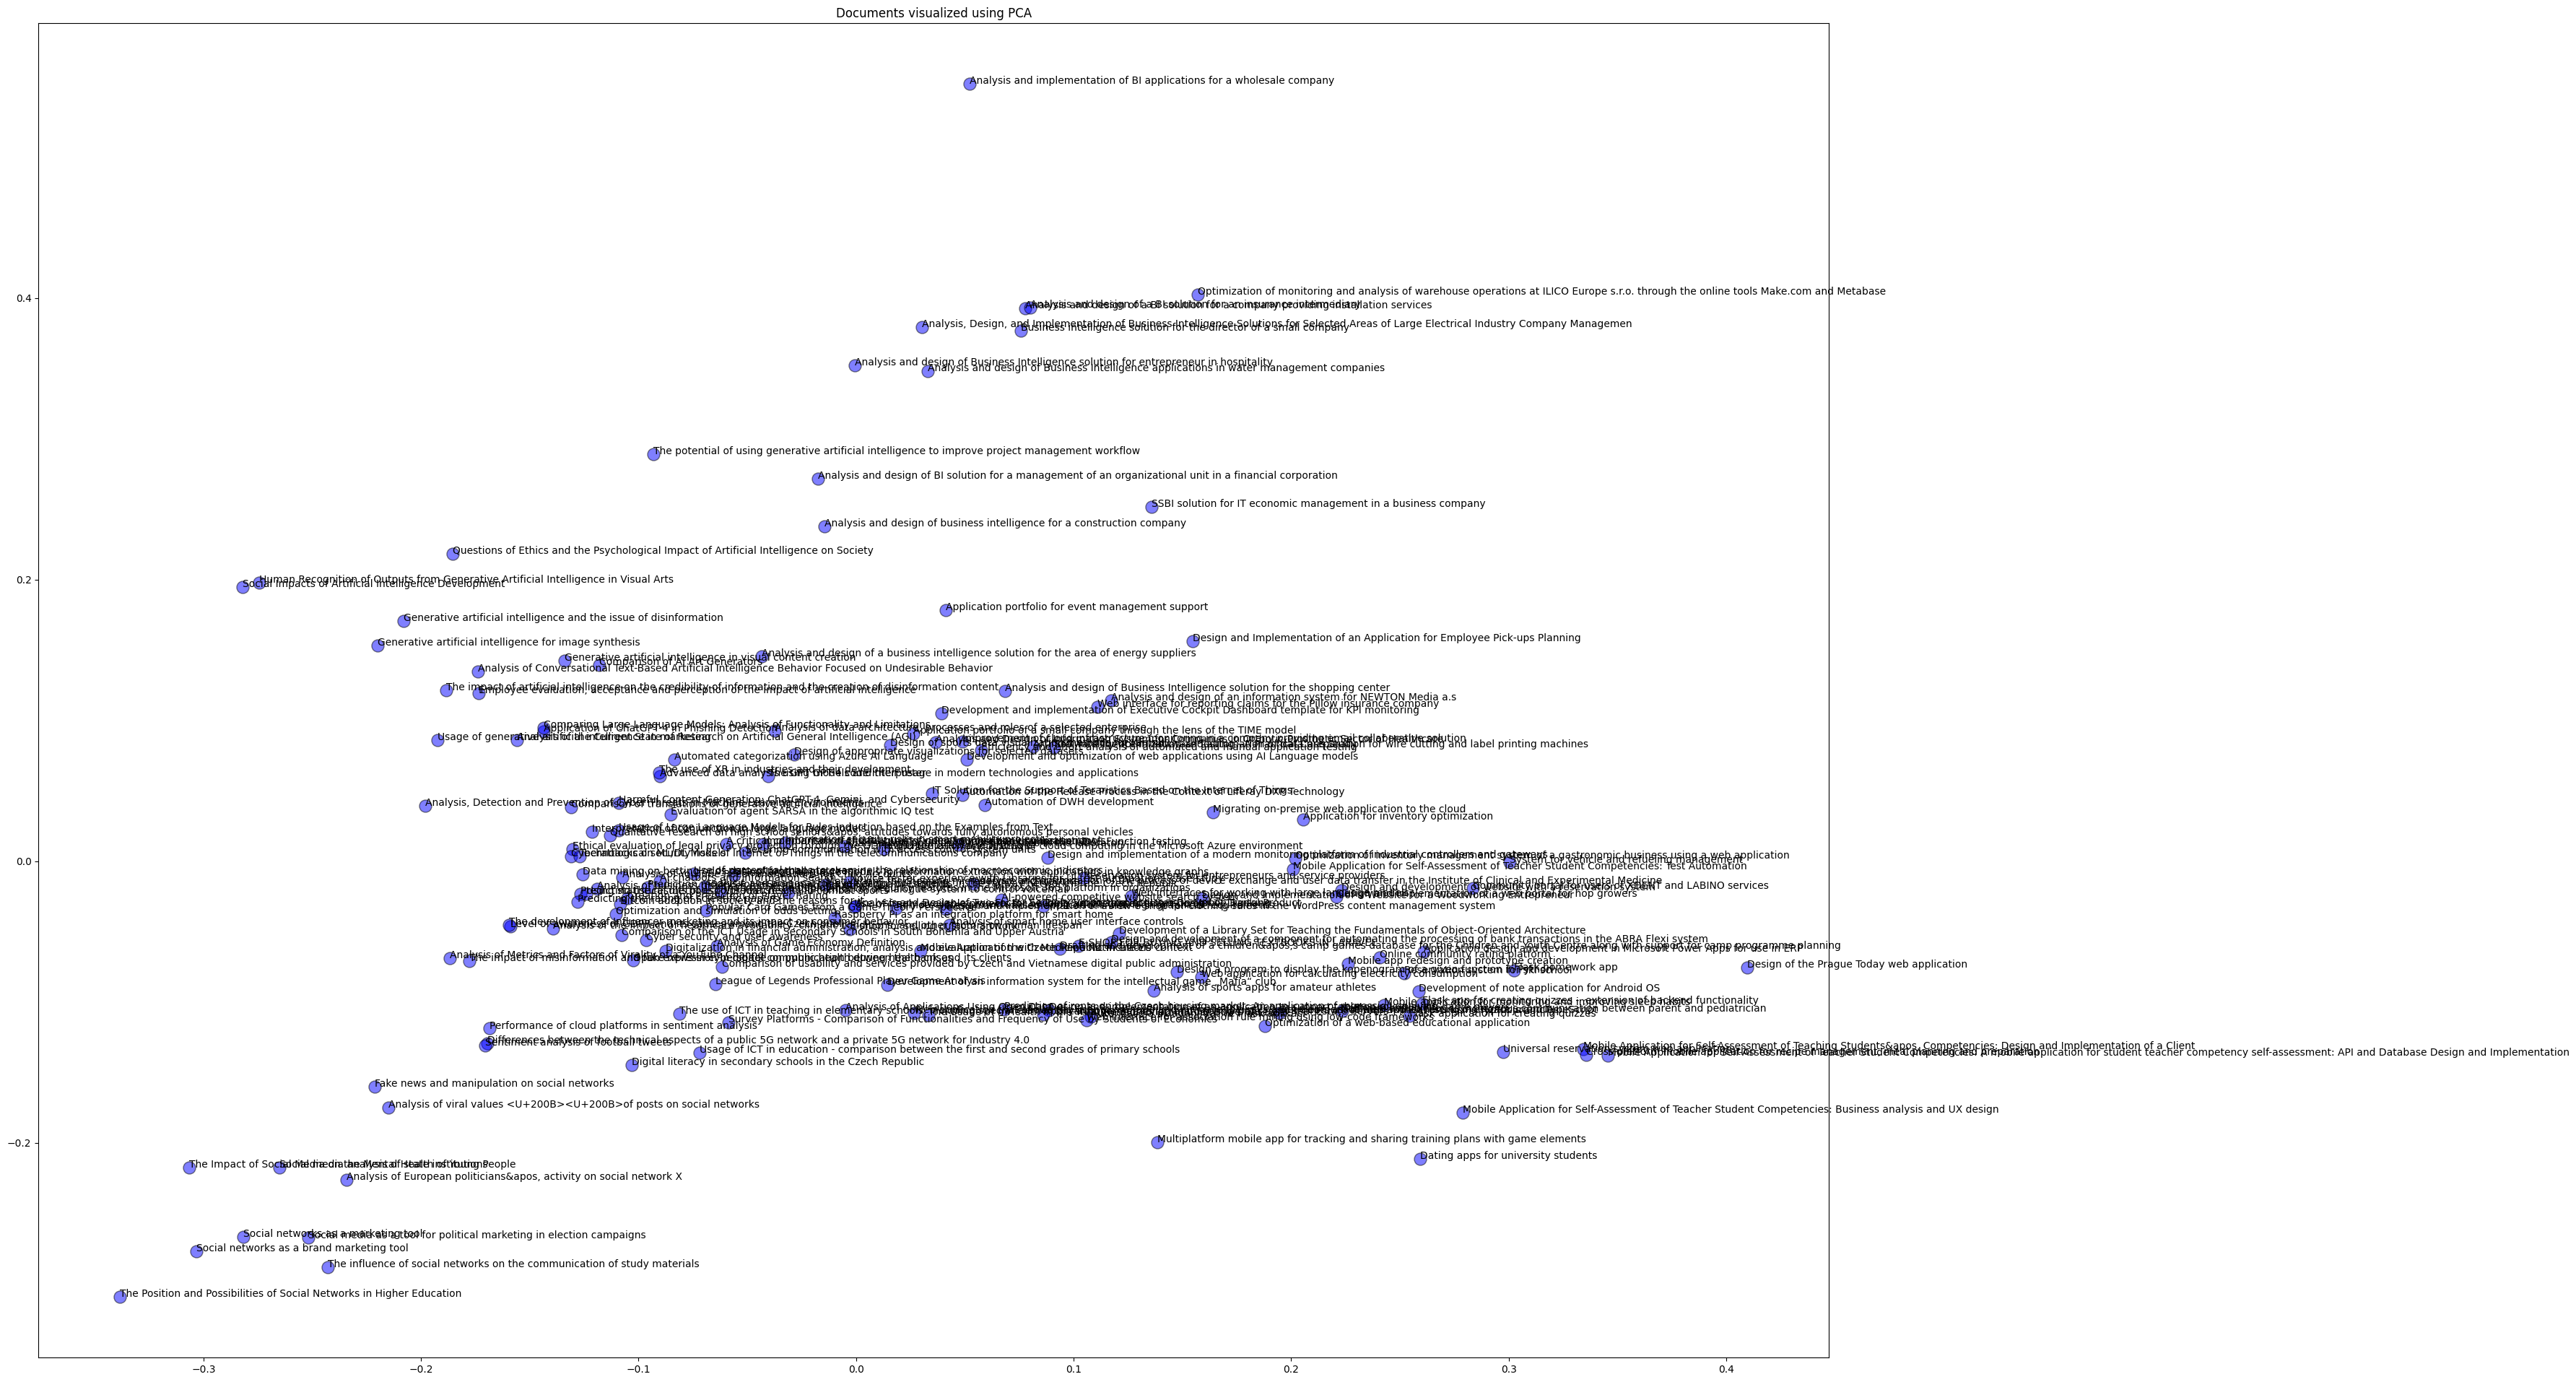

In [124]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_df)

plt.figure(figsize=(32, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolors='k', s=150, alpha=0.5)
for i, filename in enumerate(names):
    plt.annotate(filename, (reduced_data[i, 0], reduced_data[i, 1]))
plt.title("Documents visualized using PCA")
plt.show()

### t-SNE

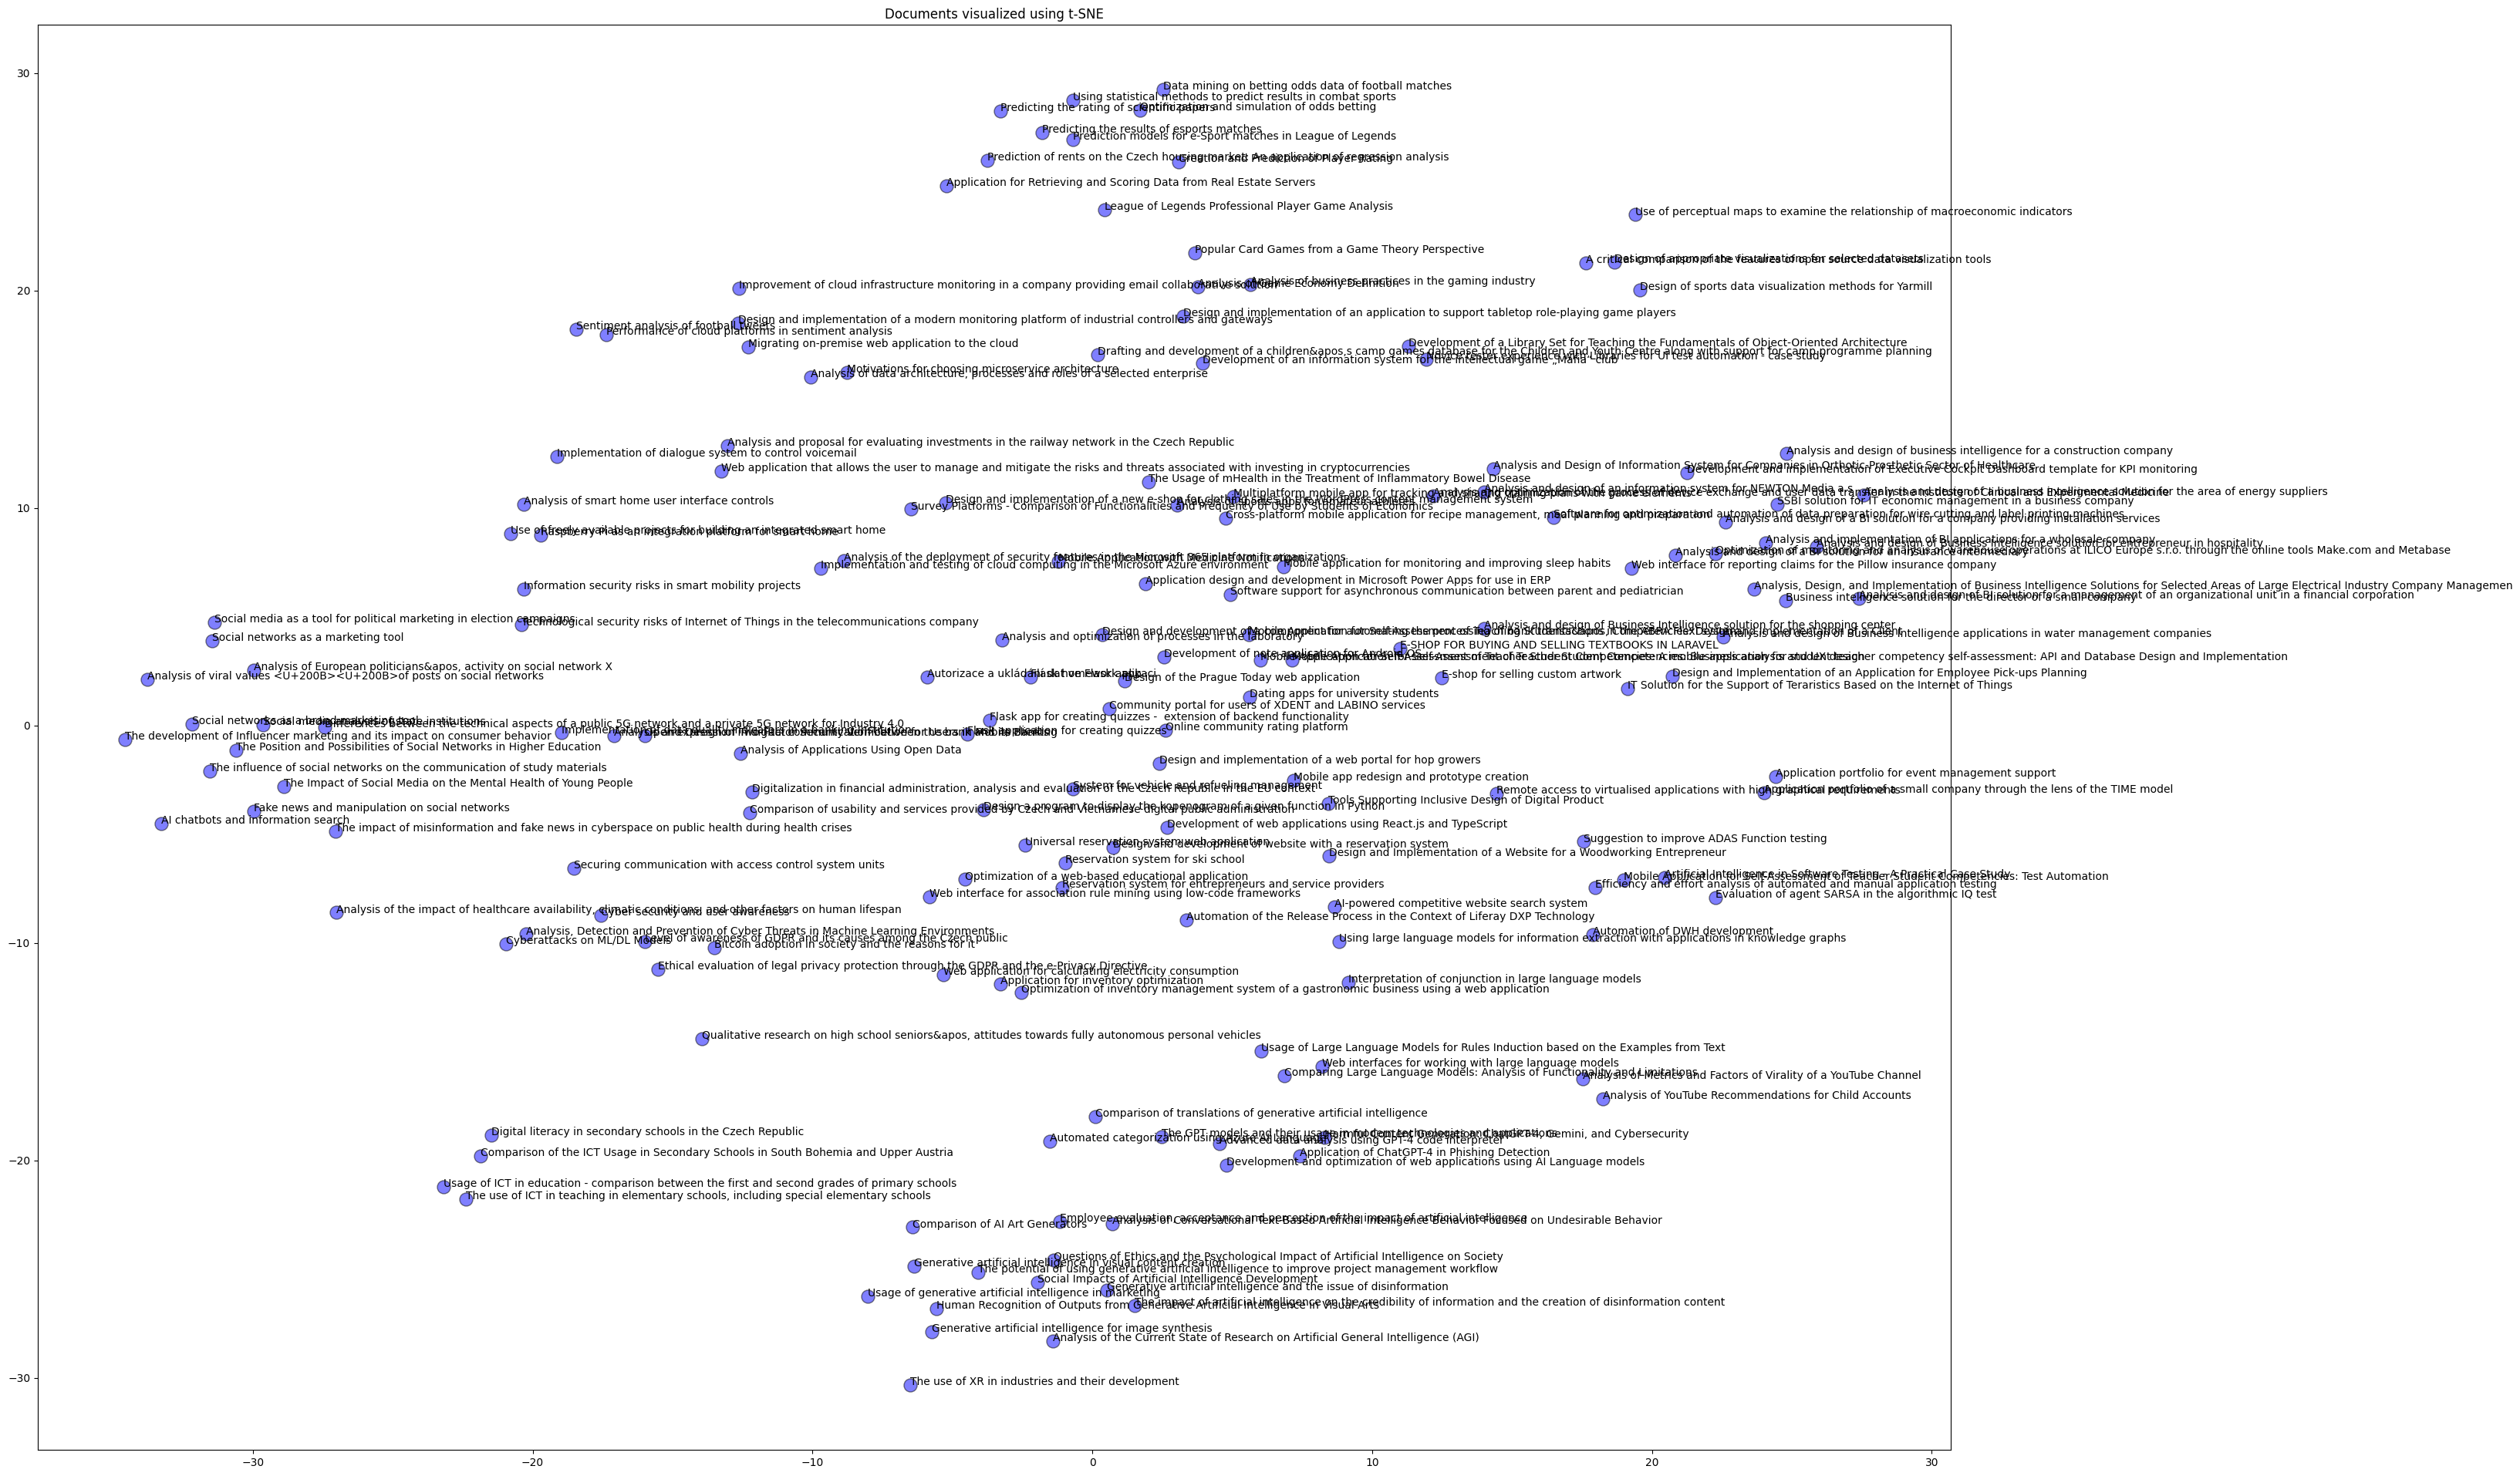

In [125]:
# Plot tSNE embeddings function
def plot_tsne(similarity_matrix, filenames):
    perplexity = min(10, len(filenames) - 1)  # Perplexity must be lower than the number of items
    distance_matrix = 1 - similarity_matrix
    distance_matrix[distance_matrix < 0] = 0  # We do not want to have negative values
    tsne = TSNE(n_components=2, metric="precomputed", perplexity=perplexity, init="random", random_state=42)
    embedding = tsne.fit_transform(distance_matrix)

    plt.figure(figsize=(32, 24))
    plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', edgecolors='k', s=150, alpha=0.5)
    for i, filename in enumerate(filenames):
        plt.annotate(filename, (embedding[i, 0], embedding[i, 1]))
    plt.title("Documents visualized using t-SNE")
    plt.show()
    
plot_tsne(similarity_matrix, names)


# Clustering
This section should contain:

List of clustering methods considered
Estimation of the number of clusters (methods, results, discussion)
Comparison of (the results of) clustering methods on the selected dataset


## Hierarchical clustering

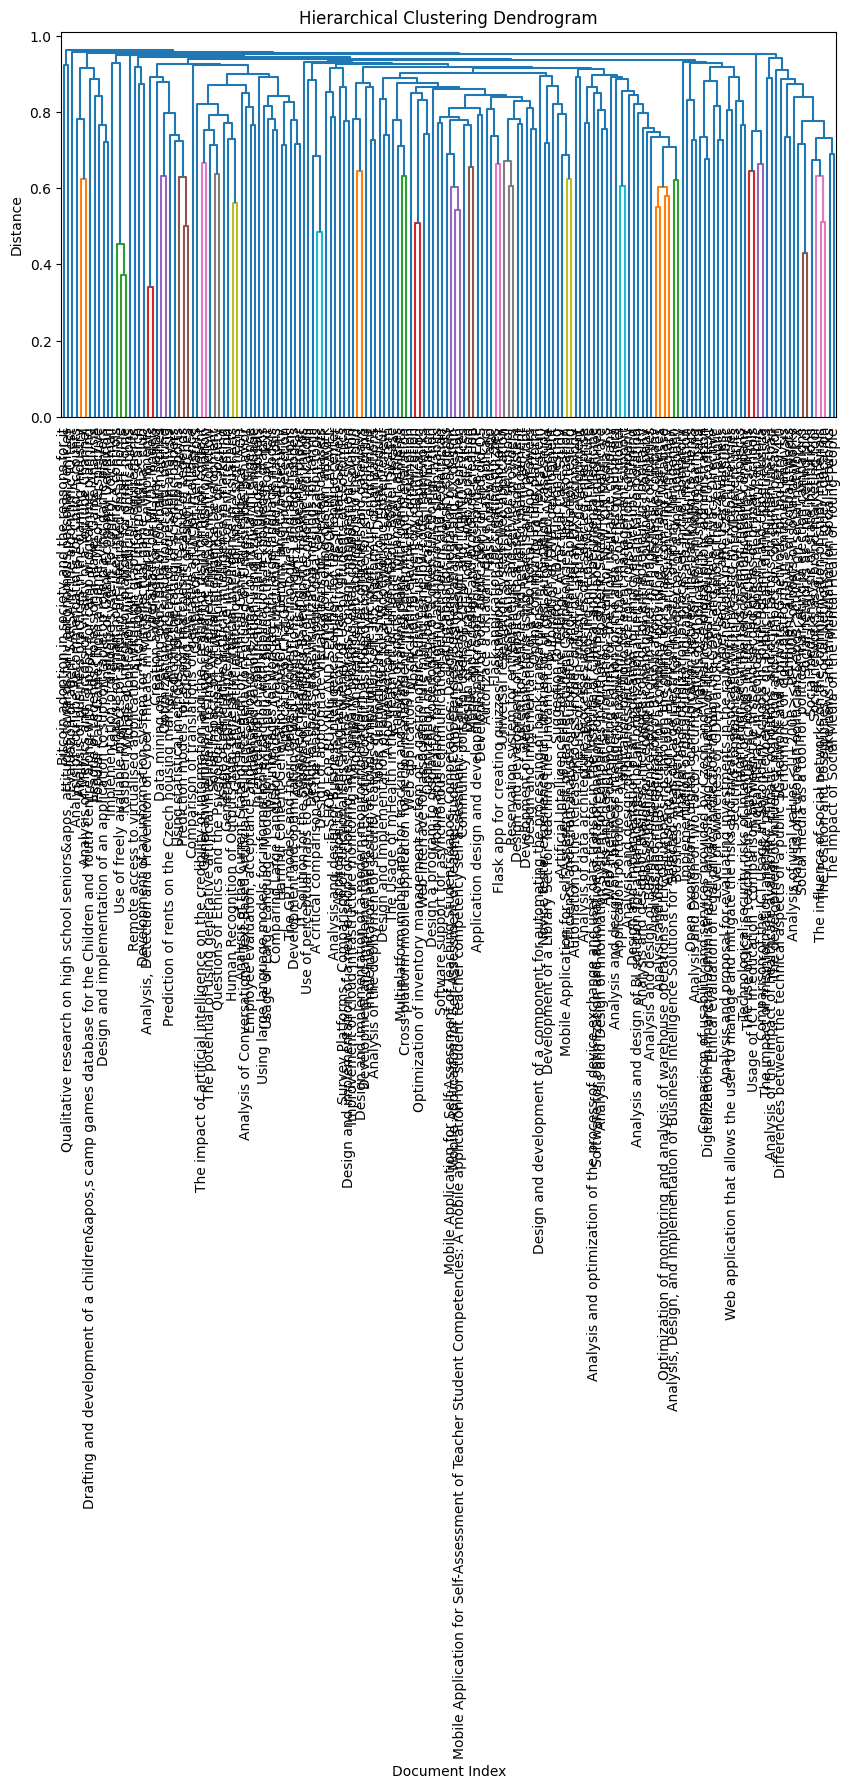

In [126]:
def plot_dendrogram(dtm_df:pd.DataFrame):
    
    # Perform the first part -- hierarchical clustering
    linkage_matrix = sch.linkage(dtm_df, metric='cosine', method='average')

    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    sch.dendrogram(linkage_matrix, labels=dtm_df.index, leaf_font_size=10)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Document Index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(tfidf_df)


## Non-hierarchical clustering

### k-Means

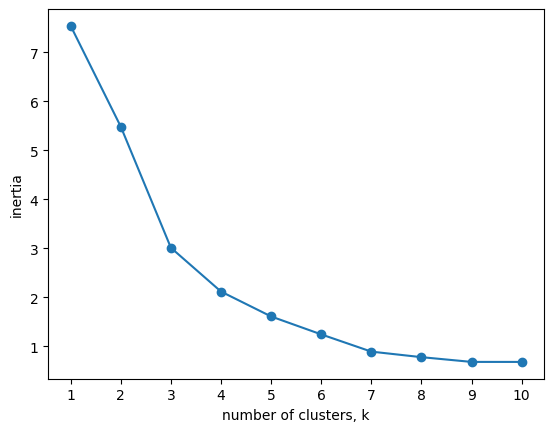

In [127]:
def plot_inertia(ks:list[int], kmeans_data):
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(X=kmeans_data)
        inertias.append(model.inertia_)
        
    plt.plot(ks, inertias, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

k_list = list(range(1,11))
plot_inertia(ks= k_list, kmeans_data=reduced_data)

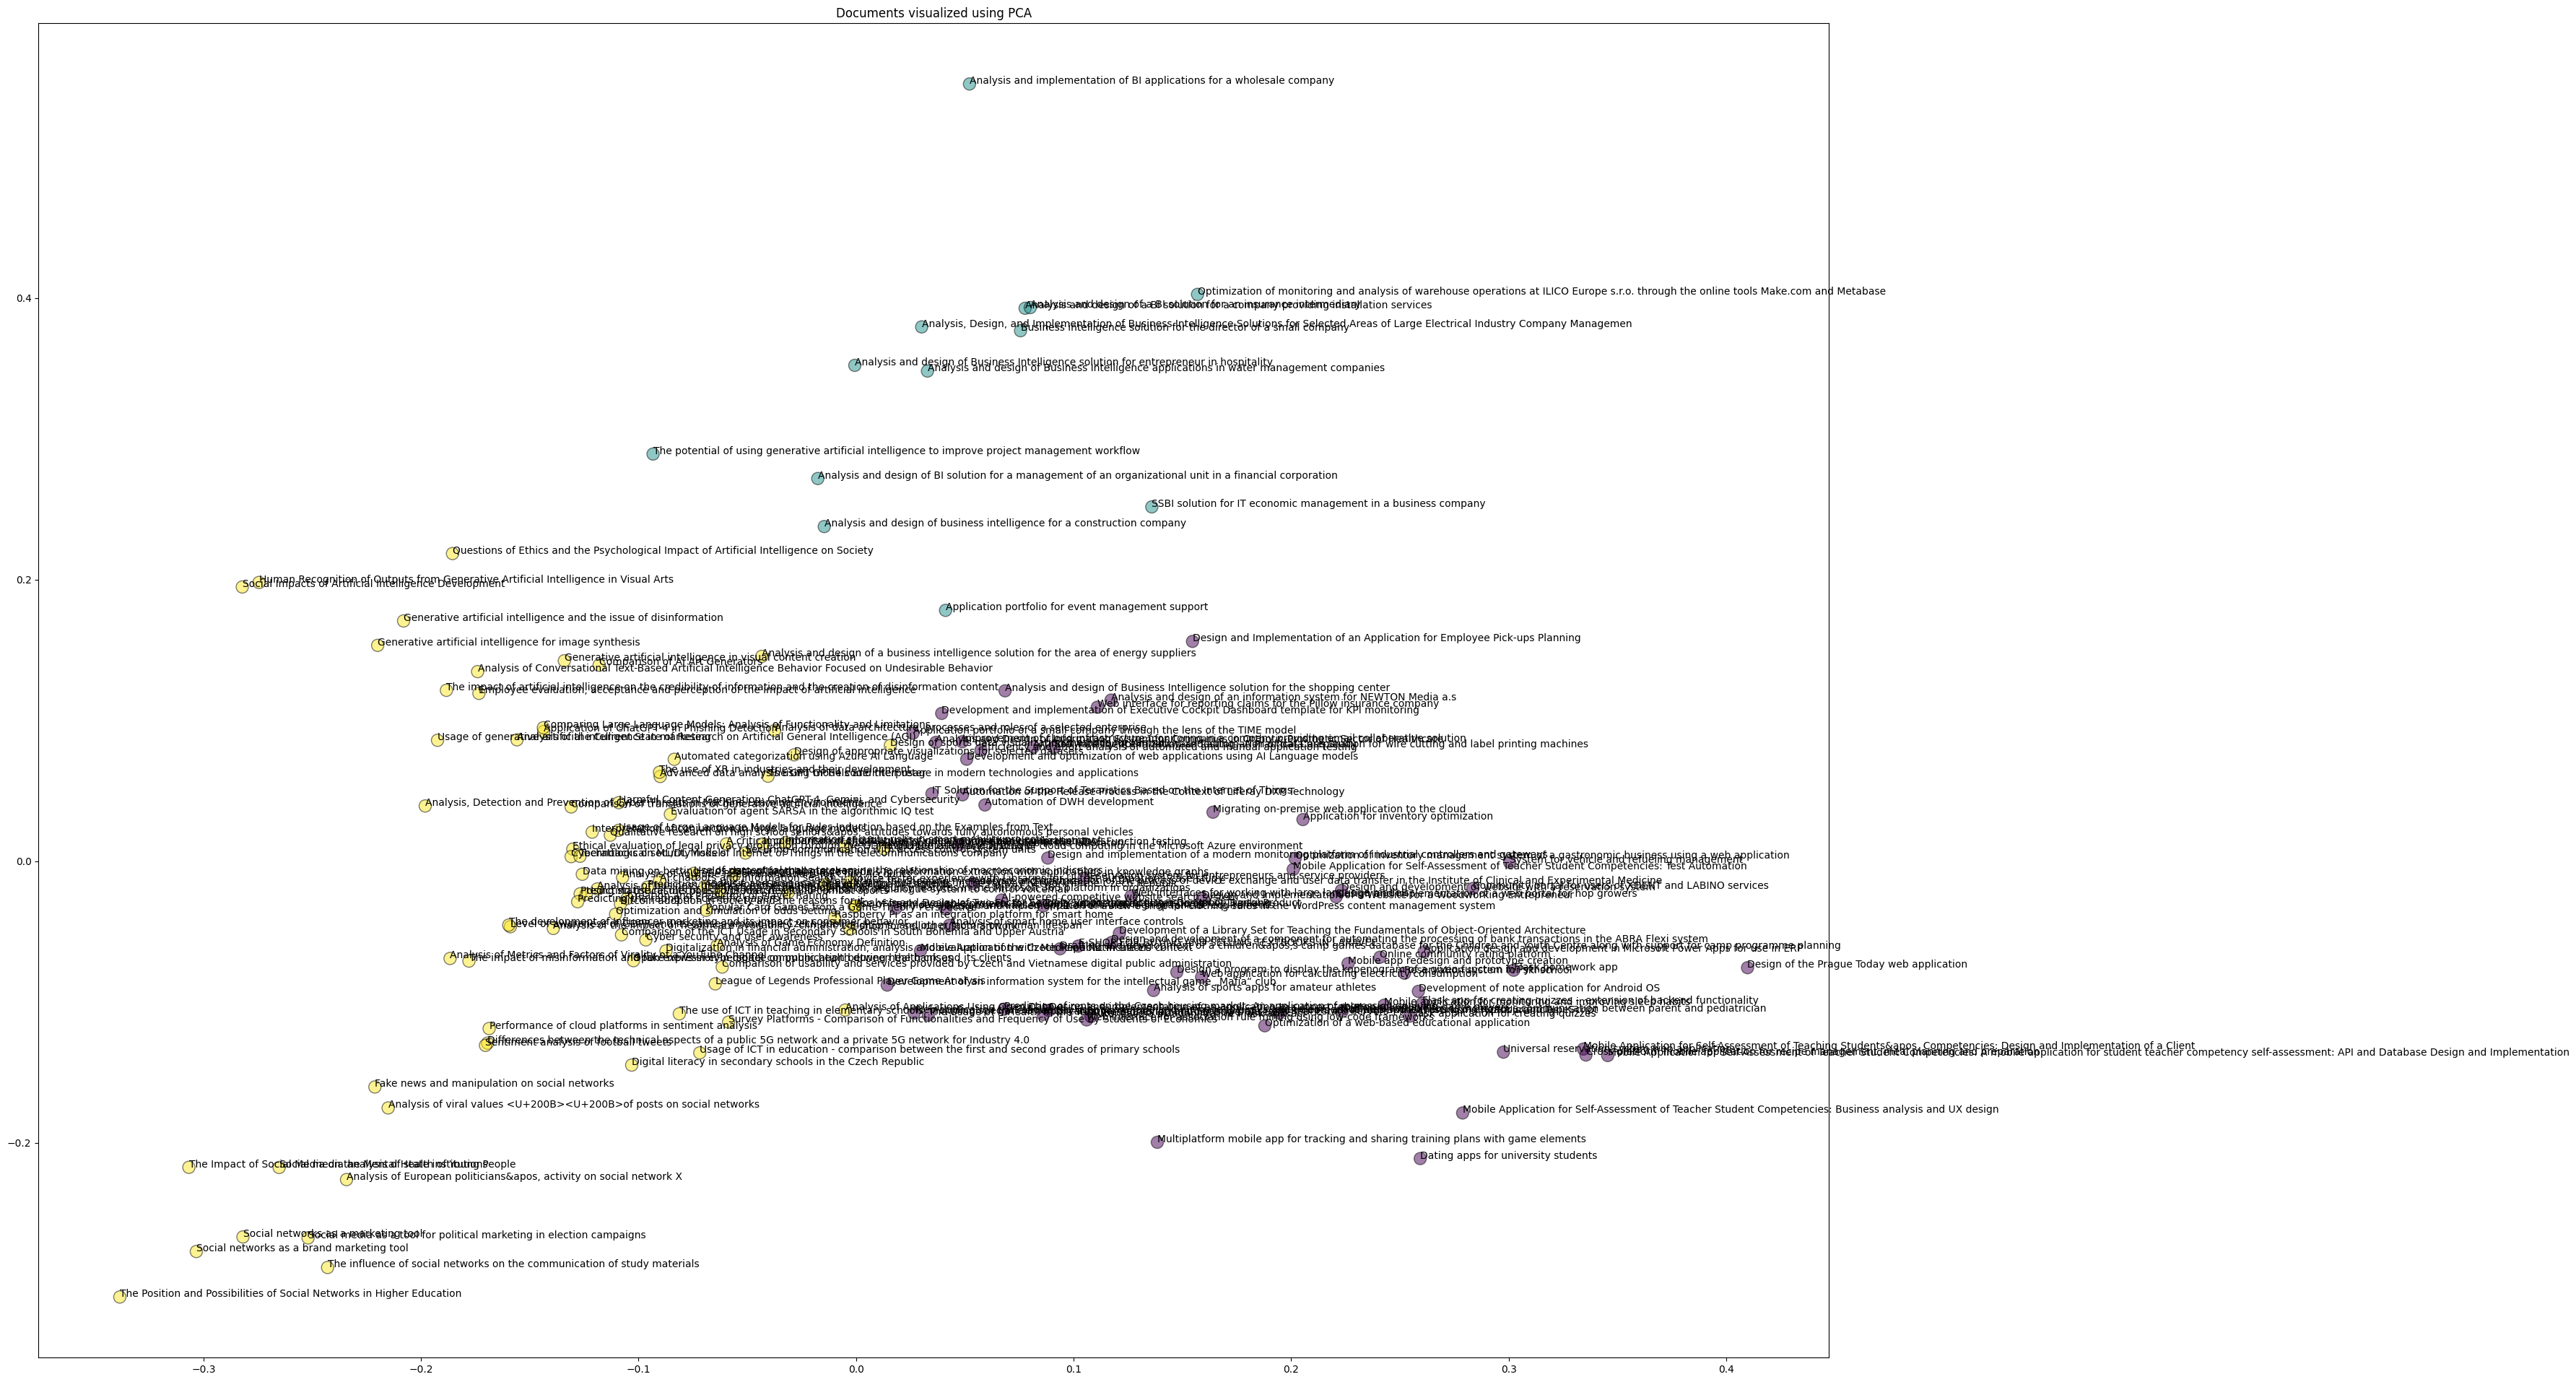

In [130]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(32, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, edgecolors='k', s=150, alpha=0.5)
for i, filename in enumerate(names):
    plt.annotate(filename, (reduced_data[i, 0], reduced_data[i, 1]))
plt.title("Documents visualized using PCA")
plt.show()

In [129]:
df_fis["cluster"] = clusters

samples = df_fis.groupby('cluster', group_keys=False).apply(lambda x: x.sample(1),  include_groups=False)
for sample in samples[["titleEN","AbstractEN"]].values:
    print(sample)

['Analysis and design of an information system for NEWTON Media a.s'
 'The subject of this paper is to introduce the process of software development from initial analysis (requirement gathering) to implementation and verification. The thesis describes most of the phases of the SDLC cycle on a\xa0real project of creating a\xa0new information system for the Czech branch of NEWTON Media company.  The main objective of the thesis is to analyse and define the existing communication problem between the client support and data production departments and to further solve this problem by implementing a\xa0new information system according to the needs of the company. The new information system should help to improve the quality of data transfer between the departments mentioned above.  In the introduction part of the thesis, the company in question is analysed, and two key management areas, customer support and data production, are presented. The thesis then deals with collecting and analysing u


# Cluster Descriptions
The clusters (at least important part of them) should be described.

This section should contain:

Description of the selected approach
Examples of the descriptions obtained



# Visualization
This section should contain:

At least one visualization related to clustering



# Analytical Report
The entire work should be ended by the final analytical report of findings on the selected dataset. It should point out your main results, their justifications, hypotheses, conclusions, outliers, ...